# The Python ecosystem - The scikit-learn library

Introducion to the scikit-learn API is given on March 19, 2018.

## Modeling pipeline in scikit learn 

* Loading The Data
* Training And Test Data
* Preprocessing The Data
* Create the Model
* Model Fitting
* Prediction
* Evaluate the Model's Performance
* Tune the Model

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading The Data

Your data needs to be numeric and stored as NumPy arrays or SciPy sparse matrices. Other types that are convertible to numeric arrays, such as Pandas `DataFrame`, are also acceptable.

**Data for a Machine Learning model may look like this...**

In [2]:
import numpy as np
X = np.random.random((10,5))
X[X < 0.3] = 0
print("Features array: {}\n".format(X.shape), X)
y = np.array(['M','M','F','F','F','M','M','F','F','F'])
print("Labels: {}\n".format(y.shape),y)

Features array: (10, 5)
 [[0.30803399 0.         0.6988766  0.77378831 0.45179078]
 [0.         0.3174676  0.68912935 0.30487336 0.        ]
 [0.59842523 0.52075856 0.94382883 0.67041475 0.        ]
 [0.         0.87735166 0.53603367 0.62114547 0.30963012]
 [0.39734144 0.53349015 0.77449442 0.52463126 0.67060899]
 [0.56628069 0.46029756 0.         0.         0.82681932]
 [0.86355185 0.8195637  0.506315   0.         0.89011051]
 [0.98111348 0.33435866 0.69341047 0.77921177 0.        ]
 [0.         0.99212166 0.52036123 0.         0.        ]
 [0.36023192 0.5486912  0.30442296 0.59048203 0.32502868]]
Labels: (10,)
 ['M' 'M' 'F' 'F' 'F' 'M' 'M' 'F' 'F' 'F']


Further scikit-learn provides a rich [dataset loading utilities](http://scikit-learn.org/stable/datasets/index.html). It comes with easy to load toy datasets, sample images and sample generators.

**Toy datasets:**

Boston house-prices dataset (regression)

    load_boston() 	
    
Iris dataset (classification)

    load_iris()

Diabetes dataset (regression)

    load_diabetes() 

Digits dataset (classification)

    load_digits()

Linnerud dataset (multivariate regression) 

    load_linnerud()
 
Wine dataset (classification)
  
    load_wine() 	

Breast cancer wisconsin dataset (classification)
  
    load_breast_cancer() 	
    

In [3]:
from sklearn.datasets import load_boston
ds = load_boston()

In [4]:
print(ds.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
print("Features array: {}\n".format(ds.data.shape), ds.data)
print("Labels: {}\n".format(ds.target.shape),y)

Features array: (506, 13)
 [[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
Labels: (506,)
 ['M' 'M' 'F' 'F' 'F' 'M' 'M' 'F' 'F' 'F']


**Sample generators:**

In [6]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=25, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, 
                           random_state=33)

In [7]:
print("Features array: {}\n".format(X.shape), X)
print("Labels: {}\n".format(y.shape),y)

Features array: (25, 2)
 [[ 0.84119533 -0.59034282]
 [ 0.30073529  1.32948683]
 [-0.35158507  0.72574001]
 [ 0.7203474  -0.57451647]
 [-1.91833439  2.08364911]
 [ 0.9030502   1.23783064]
 [-0.15302041  0.91097803]
 [ 1.44607025 -1.28411479]
 [-1.61288264 -0.64351396]
 [-0.9272653   0.24159894]
 [ 1.48322117  0.03325729]
 [-1.33804029  0.57162232]
 [-1.69935283  1.3004686 ]
 [-0.72134521  0.3439439 ]
 [ 0.2942302  -0.16300197]
 [-0.0526431   1.76285091]
 [-1.17874604 -0.62427607]
 [ 0.49636809  0.57330408]
 [ 0.93851305  0.34952606]
 [-0.16227224  0.42789673]
 [ 0.43508675 -1.94956553]
 [ 2.56176732 -1.68777497]
 [ 0.83080315  0.23559069]
 [ 1.19118673 -0.55582212]
 [-0.26748919  0.38544401]]
Labels: (25,)
 [0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1]


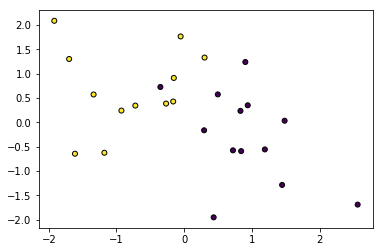

In [8]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k');

## Training And Test Data

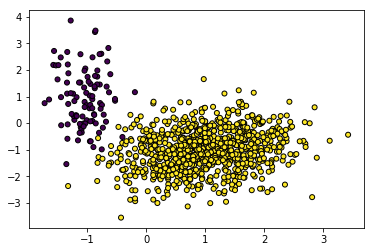

In [129]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, 
                           weights=[0.096], 
                           random_state=33)
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k');

In [130]:
np.bincount(y)

array([100, 900], dtype=int64)

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,  
                                                    shuffle=True, random_state=42)

In [132]:
print("Train set size:" , X_train.shape, "\nTest set size:", X_test.shape)

Train set size: (600, 2) 
Test set size: (400, 2)


In [133]:
print("Train label size:" , y_train.shape, "\nTest label size:", y_test.shape)

Train label size: (600,) 
Test label size: (400,)


In [134]:
pd.Series(y_train).value_counts()

1    542
0     58
dtype: int64

In [135]:
pd.Series(y_test).value_counts()

1    358
0     42
dtype: int64

This `stratify` parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter `stratify`. 

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.4, random_state=42)

print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

1    540
0     60
dtype: int64
1    360
0     40
dtype: int64


## Preprocessing The Data

## Create the Model

## Model Fitting

## Prediction

##  Evaluate the Model's Performance

## Tune the Model